In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,51,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,40,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,14,1,0,1,0,1


In [4]:
 df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['jobs_simp']=df['Job Title'].apply(title_simplifier)

In [7]:
df['jobs_simp'].value_counts()

jobs_simp
data scientist    263
na                167
data engineer     109
analyst            98
mle                22
manager            19
director           14
Name: count, dtype: int64

In [8]:
df['seniority']=df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

seniority
na        477
senior    213
jr          2
Name: count, dtype: int64

In [10]:
#Fix state Los Angeles
df['job_state'].value_counts()
df['job_state']=df['job_state'].apply(lambda x :x.strip() if x.strip().lower() !='los angeles' else 'CA')
df['job_state'].value_counts()


job_state
CA    142
MA     92
NY     71
VA     40
IL     36
MD     35
TX     26
PA     26
NC     21
WA     20
NJ     17
FL     16
OH     14
TN     13
CO     11
WI     10
IN     10
AZ      9
DC      9
MO      8
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
OR      4
NE      4
UT      4
IA      3
NM      3
KS      3
MN      2
ID      2
LA      2
RI      1
SC      1
Name: count, dtype: int64

In [11]:
#Job Description Length
df['desc_len']=df['Job Description'].apply(lambda x : len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
687    5025
688    6162
689    6130
690    3078
691    3673
Name: desc_len, Length: 692, dtype: int64

In [12]:
#Comptetior count
df['num_comp']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
687               PPD, INC Research, PRA Health Sciences
688                           Pfizer, AstraZeneca, Merck
689                      See Tickets, TicketWeb, Vendini
690                                                   -1
691                                                   -1
Name: Competitors, Length: 692, dtype: object

In [13]:
#Hourly wage to annual
df['min_salary']=df.apply(lambda x : x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'],axis=1)
df['max_salary']=df.apply(lambda x : x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'],axis=1)

df['max_salary']

0       91
1      112
2       90
3       97
4      143
      ... 
687    137
688    111
689    133
690     91
691    126
Name: max_salary, Length: 692, dtype: int64

In [14]:
df.loc[df['hourly']==1,['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
160,1,34,48
172,1,42,68
190,1,36,50
194,1,42,68
202,1,30,50
236,1,34,48
259,1,42,68
322,1,36,50
328,1,48,78
340,1,42,68


In [15]:
#remove new line from job title
df['company_txt']=df['company_txt'].apply(lambda x:x.replace('\n',''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
687                                    IQVIA
688                                      GSK
689                               Eventbrite
690           Software Engineering Institute
691             Riverside Research Institute
Name: company_txt, Length: 692, dtype: object

In [16]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,3.689595,1969.969653,0.034682,0.010116,74.445087,128.274566,100.492775,0.578035,54.030347,0.540462,0.002890,0.231214,0.235549,0.518786,3909.946532,1.128613
std,0.608508,54.089762,0.183106,0.100139,31.200090,45.999746,39.488874,0.494230,54.089762,0.498721,0.053721,0.421914,0.424648,0.500008,1497.633941,1.403713
min,-1.000000,1744.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,688.000000,0.000000
25%,3.400000,1958.000000,0.000000,0.000000,52.000000,96.000000,73.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2832.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,68.000000,124.000000,96.250000,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3776.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,157.000000,123.500000,1.000000,66.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4762.750000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'jobs_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<Axes: >

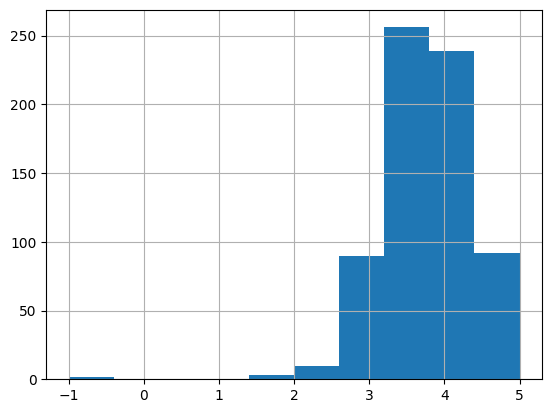

In [18]:
df['Rating'].hist()

<Axes: >

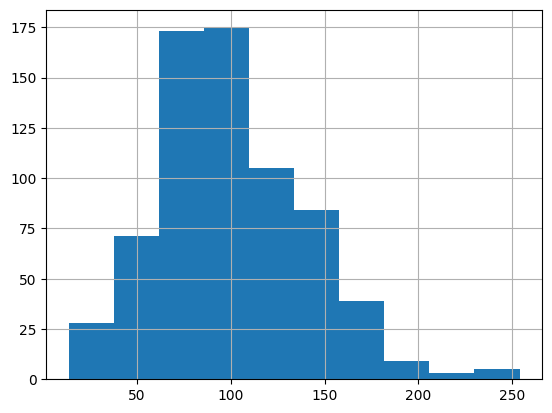

In [19]:
df['average_salary'].hist()

<Axes: >

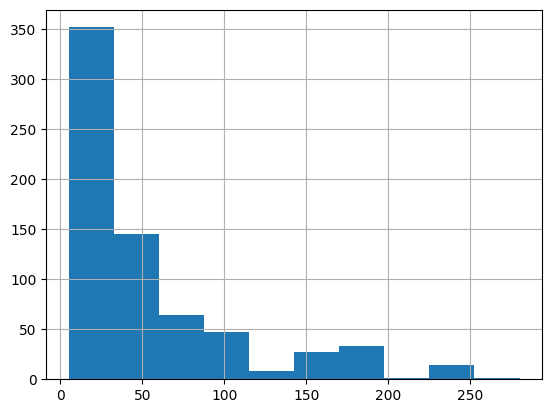

In [20]:
df['age'].hist()

<Axes: >

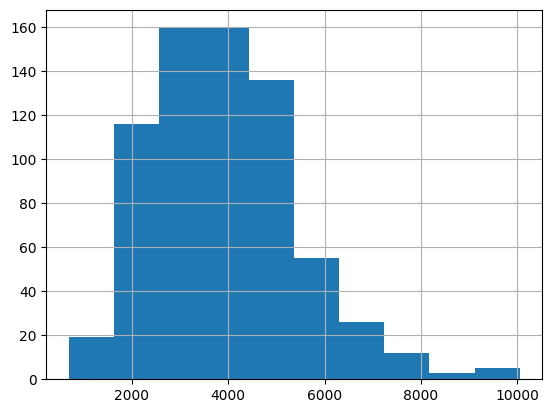

In [21]:
df['desc_len'].hist()

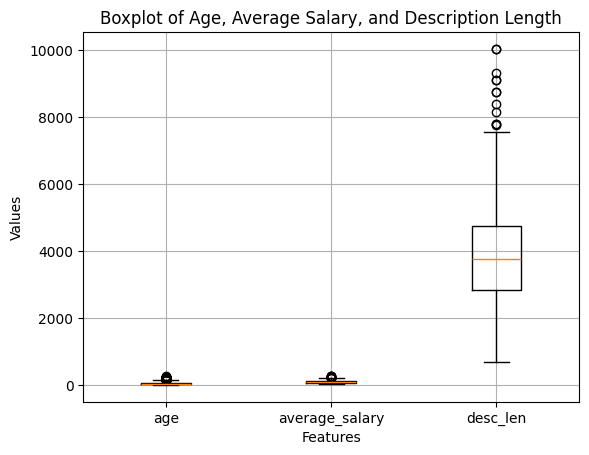

In [22]:
# DataFrame'den ilgili sütunları seçin
data = df[['age', 'average_salary', 'desc_len']]

# Boxplot çizimi
plt.boxplot(data.values, labels=data.columns)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Age, Average Salary, and Description Length')
plt.grid(True)
plt.show()


<Axes: >

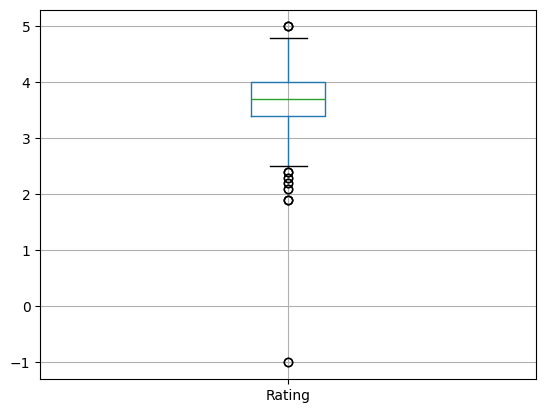

In [23]:
df.boxplot(column=['Rating'])

In [24]:
corr=df[['age','average_salary','Rating','desc_len']].corr()
corr

,age,average_salary,Rating,desc_len
age,1.000000,0.023808,-0.079415,0.152058
average_salary,0.023808,1.000000,0.045687,0.091529
Rating,-0.079415,0.045687,1.000000,-0.058842
desc_len,0.152058,0.091529,-0.058842,1.000000


<Axes: >

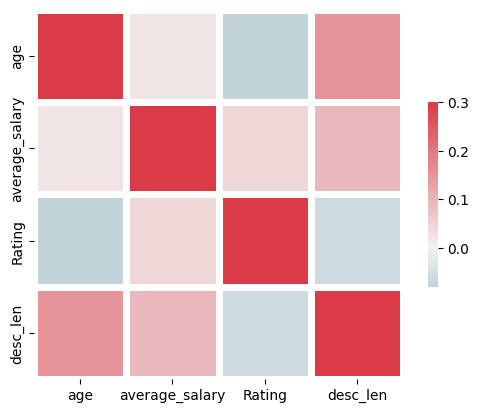

In [25]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=.3,center=0,square=True,linewidths=5,cbar_kws={'shrink':.5})

In [26]:
#Kategoriklere bakalım
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 
        'Industry', 'Sector', 'Revenue','company_txt','job_state','same_state',
           'aws_yn','excel_yn','jobs_simp','seniority']]


graph for Location : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


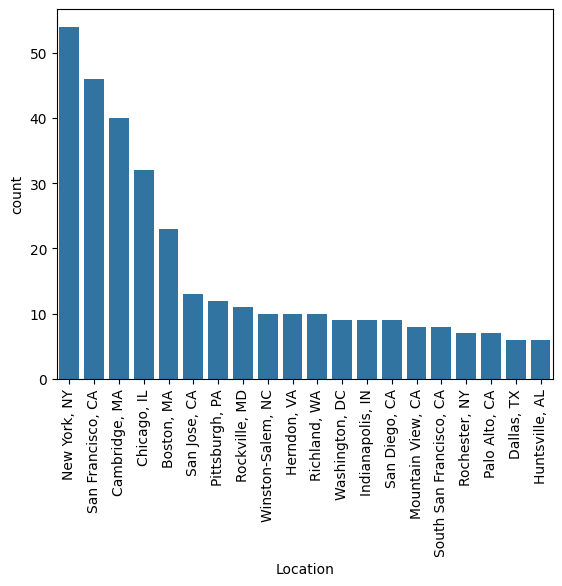

graph for Headquarters : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


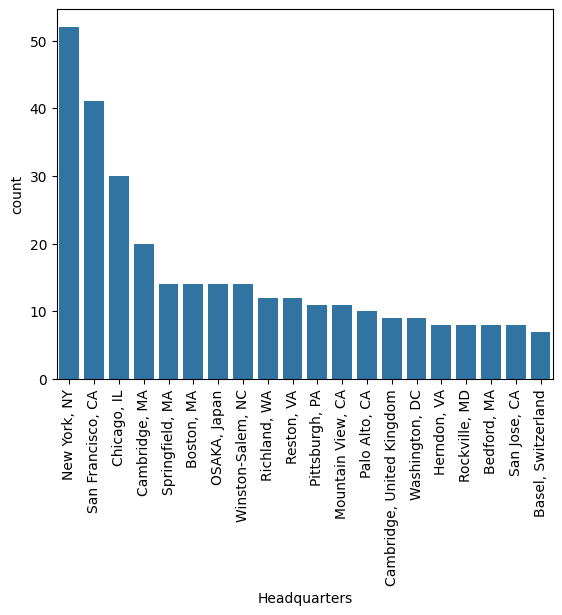

graph for Size : total = 7


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


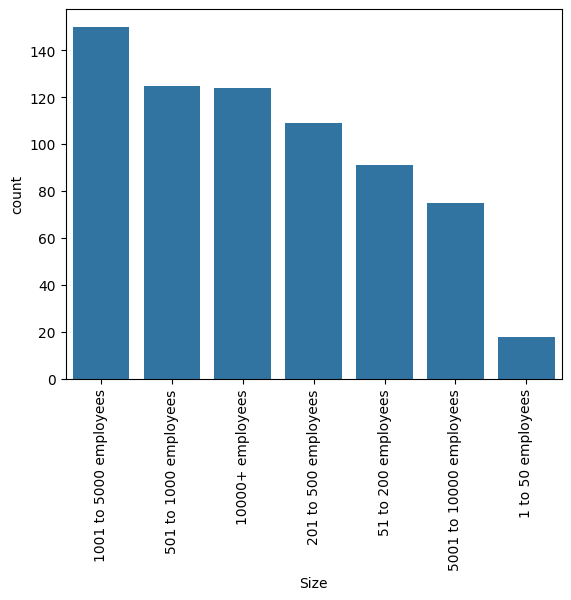

graph for Type of ownership : total = 10


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


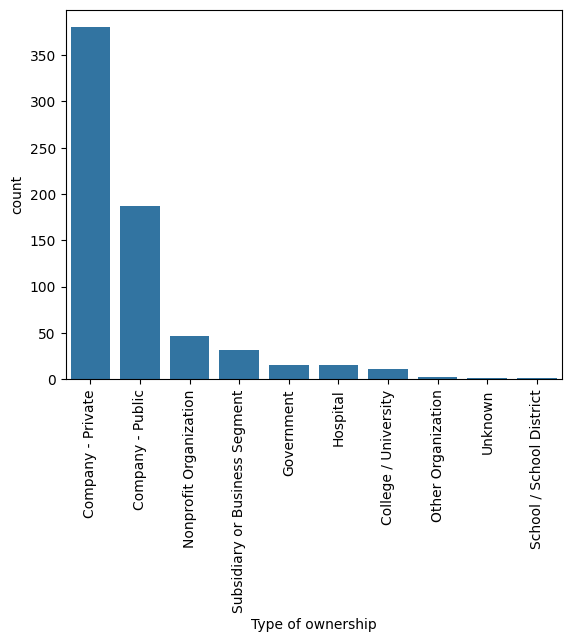

graph for Industry : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


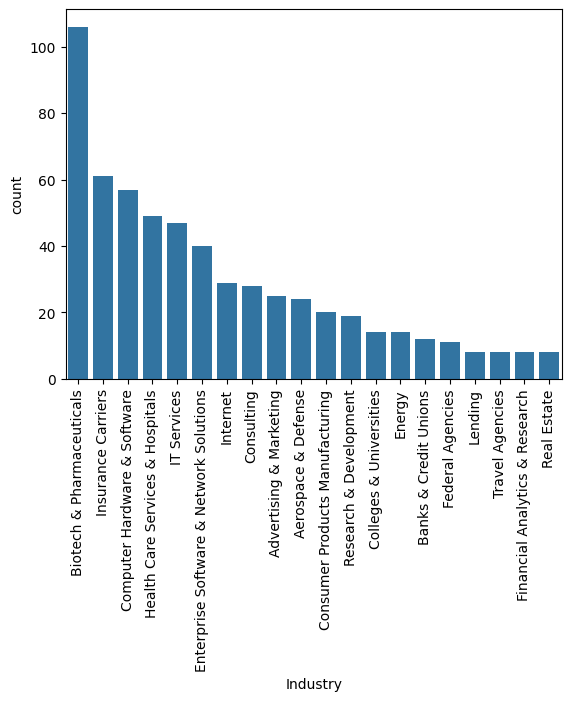

graph for Sector : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


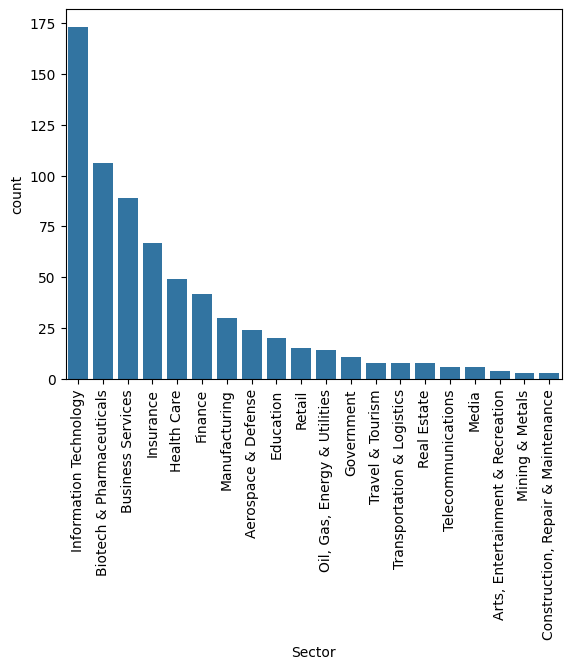

graph for Revenue : total = 12


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


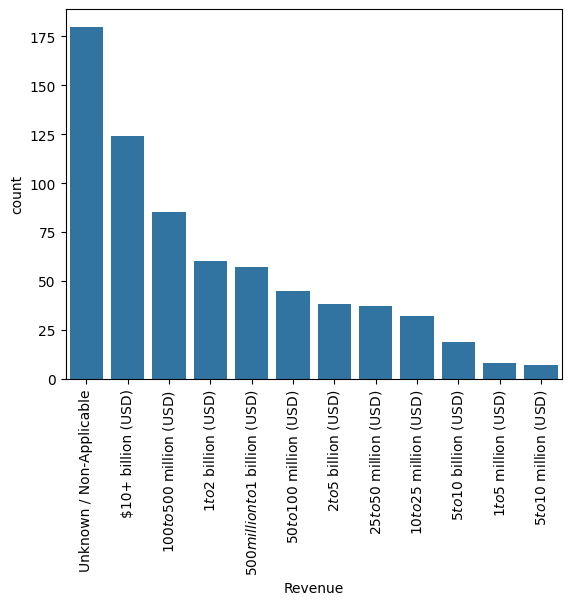

graph for company_txt : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


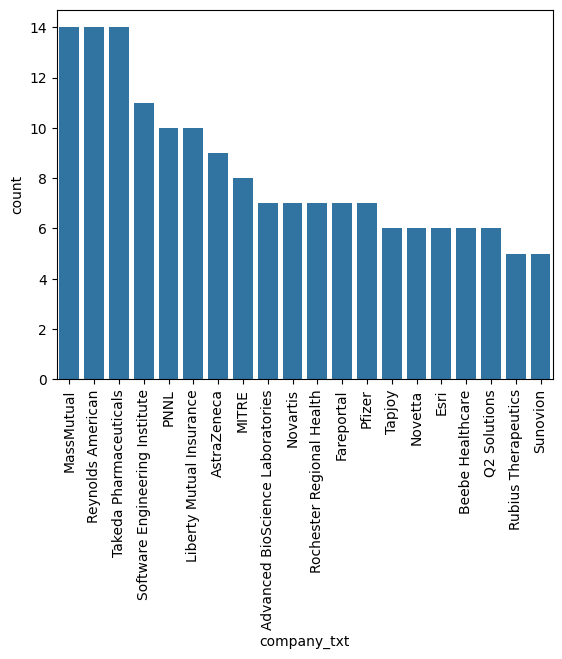

graph for job_state : total = 20


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


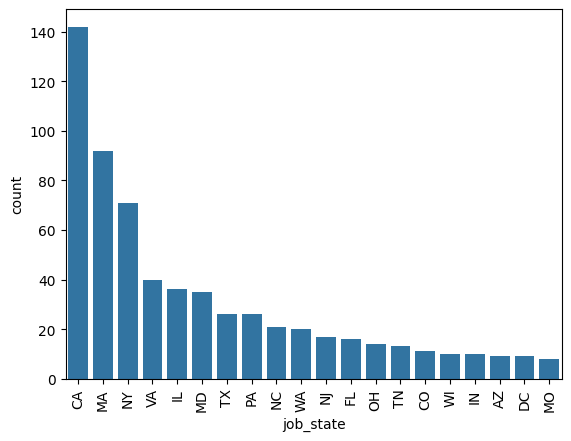

graph for same_state : total = 2


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


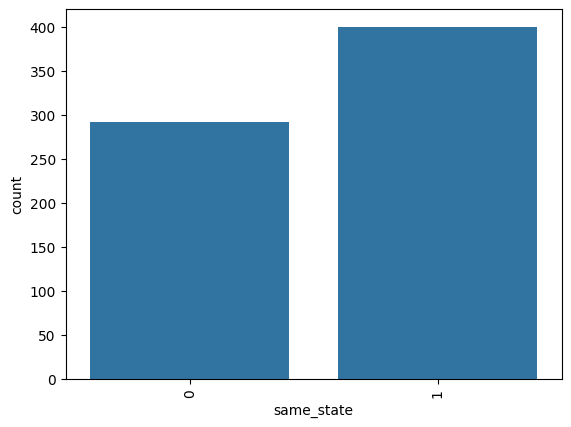

graph for aws_yn : total = 2


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


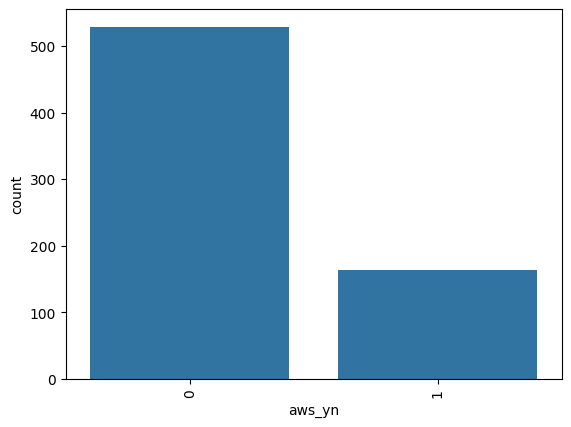

graph for excel_yn : total = 2


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


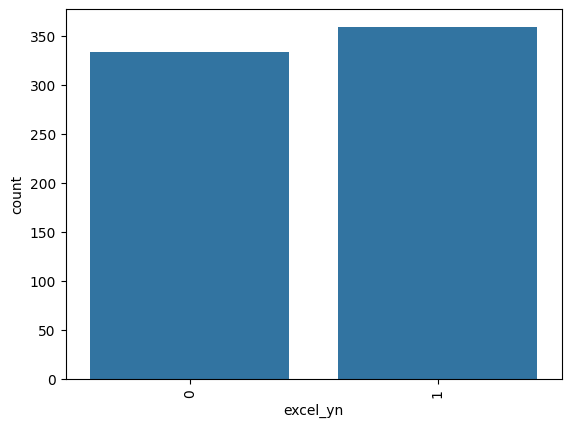

graph for jobs_simp : total = 7


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


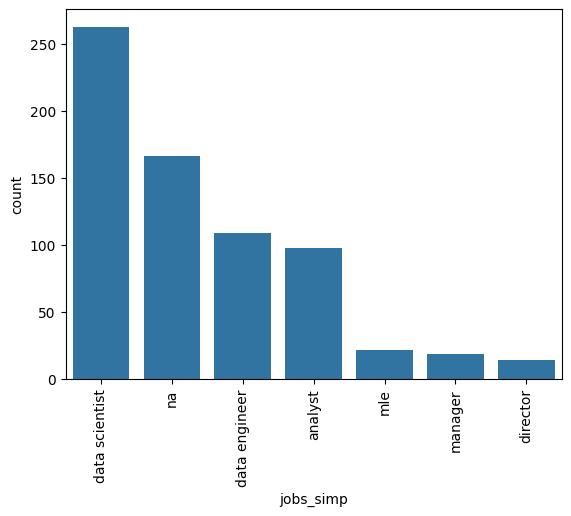

graph for seniority : total = 3


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_48713/329500297.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


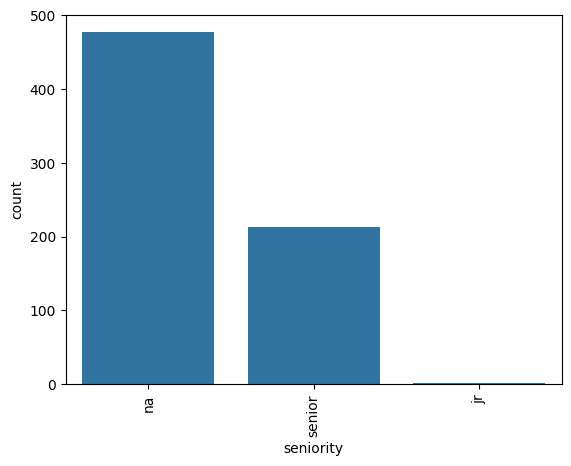

In [27]:
for i in df_cat:
    cat_num=df_cat[i].value_counts()[:20]
    print('graph for %s : total = %d' % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'jobs_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df,index='jobs_simp',values='average_salary')

,average_salary
jobs_simp,
analyst,66.306122
data engineer,106.188073
data scientist,117.334601
director,168.607143
manager,79.973684
mle,126.431818
na,83.520958


In [30]:
pd.pivot_table(df,index=['jobs_simp','seniority'],values='average_salary')

average_salary
jobs_simp      seniority                
analyst        jr              56.500000
               na              61.514286
               senior          79.092593
data engineer  na              97.189189
               senior         125.214286
data scientist jr             106.500000
               na             105.985380
               senior         138.780220
director       na             168.607143
manager        na              79.973684
mle            na             119.133333
               senior         142.071429
na             na              71.855263
               senior         108.613208

In [31]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [32]:
pd.pivot_table(df,index=['job_state'],values='average_salary').sort_values(by='average_salary',ascending=False)[:10]

,average_salary
job_state,
CA,124.545775
IL,123.791667
UT,117.125000
MA,105.668478
NJ,104.558824
MI,100.250000
DC,100.222222
RI,100.000000
NY,98.485915


In [33]:
pd.pivot_table(df,index=['job_state','jobs_simp'],values='average_salary').sort_values(by='average_salary',ascending=False)

,,average_salary
job_state,jobs_simp,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,145.000000
CA,data scientist,144.007937
MO,data scientist,143.500000
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000


In [34]:
#Salary x Rating
#Salary x Industry
#salary x sector
#salary x revenue
#salary x number of comp
#salary x hourly
#salary x employer provided
#salary x python ,r,spark ,aws,excel,desc_len,Type of ownership

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'jobs_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer provided', 'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'Type of ownership','average_salary']]


In [37]:
for i in df_pivots.columns:
    if i!='average_salary':
        print('Column Name:',i)
        print(pd.pivot_table(df_pivots,index =i, values = 'average_salary').sort_values('average_salary', ascending = False))

Column Name: Rating
        average_salary
Rating                
-1.0        225.000000
 5.0        121.166667
 4.5        117.714286
 4.1        116.368421
 3.9        113.064516
 2.6        109.083333
 4.4        108.606061
 4.2        106.925000
 4.0        105.077778
 3.7        104.879630
 3.5        104.351064
 4.7        103.983871
 4.3        102.468750
 3.2        102.142857
 3.3        101.858974
 2.2         97.750000
 4.6         97.611111
 3.8         96.811475
 2.5         96.500000
 3.4         93.104651
 2.8         90.000000
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.177778
 2.7         83.250000
 2.3         81.500000
 4.8         80.277778
 2.9         79.843750
 2.1         72.500000
 2.4         70.500000
Column Name: Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & 

In [38]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salary', aggfunc = 'count')


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16,44
$1 to $5 million (USD),1,7
$10 to $25 million (USD),16,16
$10+ billion (USD),66,58
$100 to $500 million (USD),43,42
$2 to $5 billion (USD),17,21
$25 to $50 million (USD),21,16
$5 to $10 billion (USD),9,10
$5 to $10 million (USD),5,2


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopword')

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.columns